# PyTorch Datasets
## Chris Tralie


<a href = "https://pytorch.org/tutorials/beginner/basics/data_tutorial.html">Click here</a> for more documentation on datasets and data loaders in pytorch

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from scipy import signal

# Torch Data Loader for 2D Blobs

In [5]:
class Evens:
    def __init__(self, N):
        self.N = N
    
    def __len__(self):
        return self.N
    
    def __getitem__(self, i):
        return 2*(i+1)

evens = Evens(100)
for i in range(len(evens)):
    print(evens[i], end=" ")

2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 

## Setup blobs dataset and solve logistic regression

In [12]:
class Blobs(Dataset):
    def __init__(self, n_samples, dim, offset):
        """
        Parameters
        ----------
        n_samples: int
            The number of data points in the dataset
        dim: int
            Dimension of each point
        offset: float
            The amount to add to each dimension of each point in class 1
        """
        self.n_samples = n_samples
        self.dim = dim
        self.offset = np.ones(dim)*offset
    
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, idx):
        """
        Return a tuple (x, y)
        """
        y = np.random.randint(2)
        x = np.random.randn(self.dim)
        if y == 1:
            x += self.offset
        x = torch.from_numpy(np.array(x, dtype=np.float32))
        y = torch.from_numpy(np.array(y, dtype=np.float32))
        return x, y

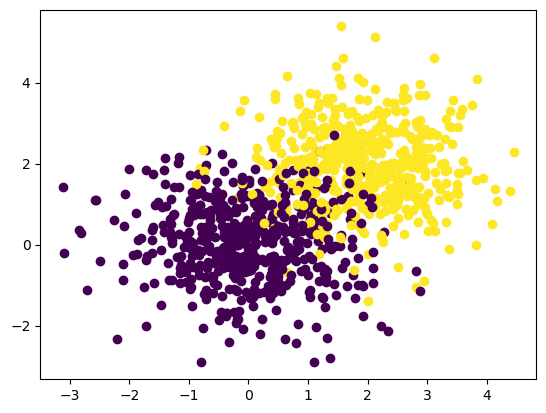

In [27]:
n_samples = 1000
data = Blobs(n_samples, dim=2, offset=2)
for i in range(len(data)):
    x, y = data[i]
    plt.scatter(x[0], x[1], c=y, vmin=0, vmax=1)
